# libraries

In [36]:
import pandas as pd
import nltk


 # preproccesing

## reading csv

In [37]:

path = 'musicLyrics.csv'
df = pd.read_csv(path)
print(df[['Lyric']].head())


                                               Lyric
0  Cryptic psalms Amidst the howling winds A scor...
1  Im sleeping tonight with all the wolves Were d...
2  Wings of the darkest descent Fall from the rea...
3  [Verse 1] Norrid Radd was my real name Had a j...
4  Deep in the dungeons of doom and despair Sneak...


## Lowercasing

In [38]:
df['Lyric2'] = df['Lyric'].str.lower()

print(df[['Lyric2']].head())


                                              Lyric2
0  cryptic psalms amidst the howling winds a scor...
1  im sleeping tonight with all the wolves were d...
2  wings of the darkest descent fall from the rea...
3  [verse 1] norrid radd was my real name had a j...
4  deep in the dungeons of doom and despair sneak...


## Removing Punctuation

In [39]:

df['Lyric3'] = df['Lyric2'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

print(df[['Lyric3']].head())


                                              Lyric3
0  cryptic psalms amidst the howling winds a scor...
1  im sleeping tonight with all the wolves were d...
2  wings of the darkest descent fall from the rea...
3  verse  norrid radd was my real name had a job ...
4  deep in the dungeons of doom and despair sneak...


## Stop Words Removal

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [42]:
stop_words = set(stopwords.words('english'))
custom_stop_words = ['oh', 'ooh', 'yeah', 'la', 'na', 'chorus', 'verse', 'intro', 'outro', 'gonna', 'wanna']
stop_words.update(custom_stop_words)
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = []
    for word in word_tokens:
        if word not in stop_words:
            filtered_text.append(word)
    return ' '.join(filtered_text)

df['Lyric4'] = df['Lyric3'].apply(remove_stopwords)

print(df[['Lyric4']].head())


                                              Lyric4
0  cryptic psalms amidst howling winds scorching ...
1  im sleeping tonight wolves dreaming life thats...
2  wings darkest descent fall realm dark blackest...
3  norrid radd real name job hated every day one ...
4  deep dungeons doom despair sneak place dark ek...


## Lemmatization

In [43]:
import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

stemmer = PorterStemmer()

def lemmatize_and_stem(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc]
    stemmed = [stemmer.stem(word) for word in lemmatized]
    return " ".join(stemmed)

df['Lyric5'] = df['Lyric4'].apply(lemmatize_and_stem)

print(df[['Lyric5']].head())


                                              Lyric5
0  cryptic psalm amidst howl wind scorch sourc ag...
1  i m sleep tonight wolf dream life that s well ...
2  wing darkest descent fall realm dark black fal...
3  norrid radd real name job hate everi day one d...
4  deep dungeon doom despair sneak place dark eke...


#  اهمیت و مراحل پیش‌پردازش و استخراج ویژگی در داده‌های متنی

---

### **۱. دلیل انجام پیش‌پردازش روی مجموعه داده متنی **

پیش‌پردازش متن مجموعه‌ای از عملیات پاک‌سازی و استانداردسازی است که قبل از تحلیل اصلی روی داده‌های متنی خام انجام می‌شود. کامپیوترها زبان انسان را به شکل ذاتی درک نمی‌کنند؛ آنها متن را به عنوان دنباله‌ای از کاراکترها می‌بینند. داده‌های متنی خام معمولاً دارای "نویز" زیادی هستند که می‌تواند مدل‌های یادگیری ماشین را به اشتباه بیندازد.

 **هدف اصلی پیش‌پردازش** کاهش پیچیدگی و حذف اطلاعات بی‌اهمیت است تا مدل بتواند روی الگوهای معنادار تمرکز کند.

**دلایل کلیدی برای پیش‌پردازش عبارتند از:**

* **استانداردسازی:** با تبدیل تمام کلمات به حروف کوچک (مثلاً `Apple` و `apple` یکسان در نظر گرفته می‌شوند) و کاهش کلمات به ریشه مشترکشان داده‌ها یکپارچه می‌شوند.
* **کاهش نویز :** حذف علائم نگارشی لینک‌ها تگ‌های اچ تی ام ال و کلمات توقف کلمات استاپ مانند همان خروف اضافه که معنای کمی دارند به مدل کمک می‌کند تا روی کلمات مهم تمرکز کند.
* **کاهش ابعاد:** با کاهش تعداد کلمات منحصر به فرد (مثلاً با یکسان‌سازی `run` `runs` و `running`) حجم محاسباتی مورد نیاز برای مدل کاهش یافته و کارایی آن افزایش می‌یابد.

---

### **۲. تفاوت جایگزینی کلمات با روش Stemming و Lemmatization**

هر دو روش برای نرمال‌سازی و کاهش کلمات به یک شکل پایه استفاده می‌شوند اما رویکرد آنها کاملاً متفاوت است.

**Lemmatization (ریشه‌یابی معنایی):**
این روش با استفاده از یک دیکشنری و تحلیل نقش دستوری کلمه (اسم فعل صفت) آن را به **شکل پایه و معنادار** خود در لغت‌نامه  برمی‌گرداند.

* **مثال:** کلمات `studies` `studying` و `studied` همگی به ریشه معنادار `study` تبدیل می‌شوند.
* **مزیت:** خروجی آن یک کلمه واقعی و قابل فهم است که دقت تحلیل را بالا می‌برد.
* **عیب:** به دلیل نیاز به تحلیل معنایی فرآیندی کندتر و پیچیده‌تر است.

 **Stemming (ریشه‌یابی پسوندی):**
این روش یک فرآیند مکانیکی و سریع است که بر اساس مجموعه‌ای از قوانین پسوندهای انتهای کلمات را **حذف می‌کند** تا به یک ریشه مشترک برسد.

* **مثال:** کلمات `studies` `studying` و `studied` ممکن است همگی به `studi` تبدیل شوند.
* **مزیت:** سرعت بسیار بالایی دارد.
* **عیب:** خروجی آن ممکن است یک کلمه واقعی نباشد و دقت کمتری نسبت به Lemmatization دارد.


### **۳. علت استخراج ویژگی‌ها **

مدل‌های یادگیری ماشین و الگوریتم‌های ریاضی قادر به درک مستقیم متن و کلمات نیستند؛ آنها فقط با **اعداد** کار می‌کنند. فرآیند **استخراج ویژگی** هنر و علم تبدیل داده‌های متنی غیرساخت‌یافته به یک نمایش عددی و ساخت‌یافته (معمولاً بردار یا ماتریس) است که برای الگوریتم‌ها قابل فهم باشد.

ما به خواندن داده متنی بسنده نمی‌کنیم زیرا الگوریتم‌ها برای یادگیری الگوها مقایسه شباهت‌ها و انجام محاسبات به ورودی عددی نیاز دارند.

**ضرورت استخراج ویژگی**

* **قابلیت فهم برای ماشین:** تبدیل متن به برداری از اعداد (مثلاً با روش **TF-IDF**) به الگوریتم اجازه می‌دهد تا شباهت بین متون را به صورت ریاضی اندازه‌گیری کند.
* **شناسایی الگو:** نمایش عددی به مدل امکان می‌دهد تا الگوهای آماری پنهان در متن را که برای انسان قابل مشاهده نیست شناسایی کند.
* **کاهش اطلاعات به موارد کلیدی:** فرآیند استخراج ویژگی اطلاعات مهم متن را در یک فرمت فشرده و کارآمد خلاصه می‌کند و اطلاعات اضافی را حذف می‌نماید.

به طور خلاصه همان‌طور که یک نقشه دنیای فیزیکی را به یک نمایش ساخت‌یافته برای مسیریابی تبدیل می‌کند استخراج ویژگی نیز دنیای پیچیده زبان را به یک نمایش عددی برای تحلیل توسط ماشین تبدیل می‌نماید.

با بررسی انجام شده تمام روش ها تاثیرات خاص خود را گذاشتند اما استاپ ورد ها تاثیر ملموس تری داشت

# Problem process

shape: (2999, 384)
--------------------------------------------------
clusrering


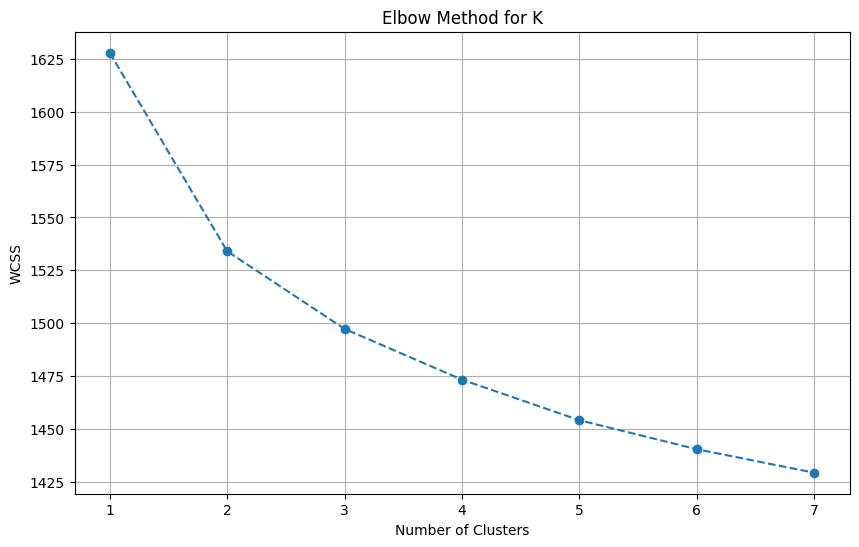

                                                  Lyric  \
0     Cryptic psalms Amidst the howling winds A scor...   
1     Im sleeping tonight with all the wolves Were d...   
2     Wings of the darkest descent Fall from the rea...   
3     [Verse 1] Norrid Radd was my real name Had a j...   
4     Deep in the dungeons of doom and despair Sneak...   
...                                                 ...   
2994  Surprise, you got a head full of lies Id rathe...   
2995  [Intro] Zion I crew Amp Live, DJ KG, Zion Were...   
2996  Torture and brutality i see through the eyes o...   
2997  They killed more childrens in Rio today Their ...   
2998  [Intro] Yeah Hello Yeah there we go Lolo [Vers...   

                                                 Lyric2  \
0     cryptic psalms amidst the howling winds a scor...   
1     im sleeping tonight with all the wolves were d...   
2     wings of the darkest descent fall from the rea...   
3     [verse 1] norrid radd was my real name had a j...

In [44]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np




model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['Lyric5'].tolist())

print(f"shape: {embeddings.shape}")
print("-" * 50)


print("clusrering")


wcss = []  
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(embeddings)



dbscan = DBSCAN(eps=0.7, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(embeddings)


hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(embeddings)



print(df)


---

### ** بخش اول:  **

#### **یادگیری با نظارت (Supervised) و  بدون نظارت (Unsupervised)**

* **Supervised (با نظارت):** یادگیری با داده‌های **برچسب‌دار** (مثل ایمیل‌های اسپم). هدف، **پیش‌بینی** برچسب برای داده‌های جدید است.
* **Unsupervised (بدون نظارت):** یادگیری با داده‌های **بدون برچسب**. هدف، **کشف ساختارها و گروه‌های پنهان** (خوشه‌ها) در داده است.
* **مقایسه:** پروژه ما از نوع **بدون نظارت** است، چون به دنبال پیدا کردن گروه‌های طبیعی در متن آهنگ‌ها بدون داشتن برچسب قبلی هستیم.

---

### **بخش دوم:   **

#### **۱. دلیل استفاده از بردار ویژگی (Feature Vector)**
کامپیوترها متن را نمی‌فهمند و فقط با **اعداد** کار می‌کنند. بردار ویژگی، ترجمه عددیِ معنای متن است تا الگوریتم‌ها بتوانند آن را پردازش کرده و شباهت‌ها را محاسبه کنند.

#### **۲.  روش‌های خوشه‌بندی**
* **K-Means:** داده‌ها را به تعداد **K** خوشه بر اساس نزدیکی به مراکز خوشه‌ها تقسیم می‌کند.
* **DBSCAN:** بر اساس **تراکم و فشردگی** داده‌ها، خوشه‌هایی با اشکال مختلف پیدا کرده و داده‌های پرت (نویز) را شناسایی می‌کند.
* **Hierarchical (سلسله‌مراتبی):** یک **شجره‌نامه** از خوشه‌ها می‌سازد که می‌توان آن را در سطوح مختلف برای رسیدن به تعداد خوشه‌های دلخواه "برید".

#### **۳. روش‌های بردارسازی متن**
* **TF-IDF:** روشی **آماری و سریع** که بر اساس تکرار و اهمیت کلمات کلیدی کار می‌کند اما معنا را درک نمی‌کند.
* **Sentence-Transformers:** روشی **مبتنی بر معنا** که با استفاده از شبکه‌های عصبی، مفهوم و زمینه متن را درک می‌کند و دقت بالاتری برای خوشه‌بندی معنایی دارد.

#### **۴. معرفی مدل و کتابخانه**
* **Sentence Transformer:** یک کتابخانه پایتون که فرآیند تبدیل متن به بردارهای معنادار را بسیار ساده می‌کند.
* **all-MiniLM-L6-v2:** یک مدل **سریع و باکیفیت** که برای وظایف عمومی مانند مقایسه شباهت و خوشه‌بندی بسیار محبوب است.

#### **۵. روش Elbow در K-Means**
یک روش نموداری برای پیدا کردن **بهترین تعداد خوشه (کا)**. نقطه‌ای که در نمودار شبیه به **آرنج خم‌شده** است، بهترین مقدار کا را نشان می‌دهد.

#### **۶. مقایسه خروجی و نتیجه‌گیری**
برای مقایسه، باید محتوای آهنگ‌های داخل خوشه‌های تولید شده توسط هر روش را بررسی کرد.
* **روش بهتر کدام است؟** روشی که خوشه‌های **معنادارتر و قابل‌تفسیرتری** ایجاد کند. برای مثال، یک خوشه فقط شامل آهنگ‌های اعتراضی باشد و دیگری فقط شامل آهنگ‌های عاشقانه.
* **دلیل بهتر بودن:** ممکن است یک روش (مثلاً دیبی اسکن) به دلیل قابلیت شناسایی نویز و پیدا کردن خوشه‌هایی با اشکال غیرمعمول، با ساختار واقعی داده‌های شما سازگارتر باشد و در نتیجه نتایج بهتری تولید کند.

# Dimension reduction

--------------------------------------------------


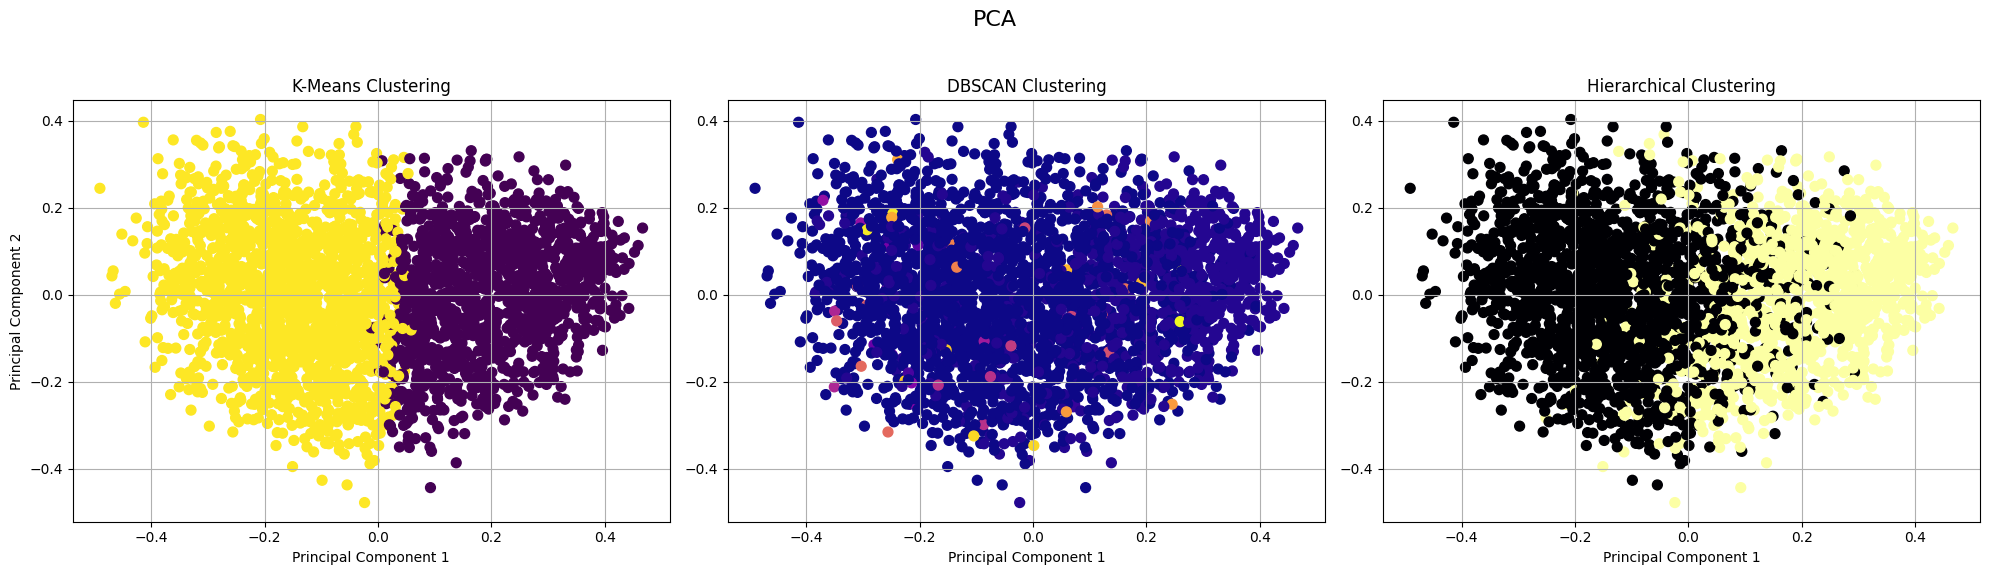

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



pca = PCA(n_components=2)

reduced_embeddings = pca.fit_transform(embeddings)

df_reduced = pd.DataFrame(reduced_embeddings, columns=['PCA1', 'PCA2'])

df_reduced['KMeans_Cluster'] = df['KMeans_Cluster']
df_reduced['DBSCAN_Cluster'] = df['DBSCAN_Cluster']
df_reduced['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

print("-" * 50)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('PCA', fontsize=16)

axes[0].scatter(df_reduced['PCA1'], df_reduced['PCA2'], c=df_reduced['KMeans_Cluster'], cmap='viridis', s=50)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

axes[1].scatter(df_reduced['PCA1'], df_reduced['PCA2'], c=df_reduced['DBSCAN_Cluster'], cmap='plasma', s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Principal Component 1')
axes[1].grid(True)

axes[2].scatter(df_reduced['PCA1'], df_reduced['PCA2'], c=df_reduced['Hierarchical_Cluster'], cmap='inferno', s=50)
axes[2].set_title('Hierarchical Clustering')
axes[2].set_xlabel('Principal Component 1')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---

**تحلیل مؤلفه‌های اصلی** یا **پی سی ای**، یک روش بسیار محبوب در یادگیری ماشین برای **کاهش بُعد** است. هدف اصلی آن، کاهش تعداد ویژگی‌های (بعد ها) یک مجموعه داده است، در حالی که تلاش می‌کند تا حد ممکن اطلاعات و ساختار اصلی داده‌ها را حفظ کند.



### **نحوه عملکرد پی سی ای:**

الگوریتم پی سی ای به دنبال پیدا کردن محورهای جدیدی در داده‌ها به نام **مؤلفه‌های اصلی ** است.

1.  **مؤلفه اصلی اول (1):** اولین محور، جهتی است که بیشترین **پراکندگی (واریانس)** را در داده‌ها دارد. به عبارتی، این همان زاویه‌ای است که داده‌ها بیشترین کشیدگی را در آن جهت دارند.

2.  **مؤلفه اصلی دوم (2):** دومین محور، جهتی است که دومین بیشترین پراکندگی را دارد، با این شرط که باید دقیقاً **عمود بر** محور اول باشد.

3.  **و الی آخر...** این فرآیند برای پیدا کردن محورهای بعدی ادامه پیدا می‌کند که هر کدام بر محورهای قبلی عمود هستند.

برای کاهش بُعد، ما فقط چند مؤلفه اصلی اول (مثلاً دو یا سه مؤلفه) را که بیشترین اطلاعات را در خود دارند، نگه می‌داریم و بقیه را نادیده می‌گیریم. سپس داده‌های اصلی را روی این چند محور جدید تصویر می‌کنیم تا یک نمایش کم‌بُعد از آنها به دست آوریم.

### **چرا از پی سی ای استفاده می‌کنیم؟**

* **مصورسازی :** مهم‌ترین کاربرد آن، کاهش داده‌های چند بعدی به ۲ یا ۳ بُعد برای رسم نمودار و درک بصری ساختار داده‌ها و خوشه‌هاست.
* **افزایش سرعت الگوریتم‌ها:** با کاهش تعداد ویژگی‌ها، سرعت آموزش مدل‌های یادگیری ماشین افزایش می‌یابد.

# Evaluation and analysis

In [46]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(embeddings, df['KMeans_Cluster'])
print(f"K-Means: {silhouette_kmeans:.3f}")

silhouette_hierarchical = silhouette_score(embeddings, df['Hierarchical_Cluster'])
print(f"Hierarchical: {silhouette_hierarchical:.3f}")

dbscan_mask = df['DBSCAN_Cluster'] != -1
silhouette_dbscan = silhouette_score(embeddings[dbscan_mask], df[dbscan_mask]['DBSCAN_Cluster'])
print(f"DBSCAN: {silhouette_dbscan:.3f}")


print("-" * 50)

num_clusters = df['KMeans_Cluster'].nunique()

for i in range(num_clusters):
    print(f"\nCluster {i} ")
    cluster_lyrics = df[df['KMeans_Cluster'] == i]['Lyric']
    for lyric in cluster_lyrics.head(2):
        print(f"- {lyric}")

K-Means: 0.052
Hierarchical: 0.038
DBSCAN: -0.033
--------------------------------------------------

Cluster 0 
- [Verse 1] Norrid Radd was my real name Had a job that I hated every day Until that one day I told my boss To just shove that damn JOB Cause I found a place I could rest my head, maybe call my home Trapped on this planet I know Found a bunch of other super powered people like before Fought against evil on my silver surfboard Cause everybody wants the power cosmic Skate across space thats our department I know alien races kinda scared when they think That the herald is there to cause fear But Im trying my best for the past mistakes Try to do good through time and space Cause Ive seen every star and Ive seen every planet But I always seem to come back to the same place [Hook] Well maybe I can be your Norrin Radd Maybe I can give you what you never had You could make a wish on a shooting star Then I could catch a wish right in my hand Maybe I can be your Norrin Radd Show you e

---


برای سنجش کیفیت نتایج خوشه‌بندی از معیارهای کمی استفاده می‌شود:

* **Silhouette Score:**
    *  این معیار فشردگی و جدایی خوشه‌ها را با مقایسه شباهت هر داده به خوشه خود در مقابل خوشه‌های دیگر می‌سنجد.
    * **بازه:** از ۱- تا ۱+. امتیاز نزدیک به **۱+** نشان‌دهنده خوشه‌های متراکم و کاملاً جدا از هم است.
    * **نکته:** این معیار به برچسب واقعی داده‌ها نیازی ندارد و برای این پروژه ایده‌آل است.

* **اHomogeneity Score:**
    * ** بررسی می‌کند که آیا هر خوشه فقط شامل اعضای یک کلاس واحد است یا خیر.
    * **نکته مهم:** این معیار نیازمند **دانستن برچسب‌های واقعی داده‌ها ** است. از آنجایی که پروژه ما بدون نظارت است، این معیار **غیرقابل استفاده** است.

---


---

#### **تحلیل نتایج**

با توجه به خروجی کد، نتایج کمی و کیفی را می‌توان به شرح زیر تحلیل کرد:

* **ارزیابی کمی (امتیاز سیلوئت):**
    امتیاز بالاتر برای یک روش (مثلاً کا مینز) نشان‌دهنده این است که خوشه‌های تولید شده توسط آن، فشردگی داخلی و جدایی بهتری از یکدیگر دارند.

* **ارزیابی کیفی (محتوای خوشه‌ها):**
    با بررسی نمونه‌های چاپ شده از هر خوشه، معنای هر خوشه را تفسیر می‌کنیم. اگر خوشه‌ها دارای مضامین مشخص و منسجم باشند (مثلاً یک خوشه فقط شامل آهنگ‌های عاشقانه و دیگری فقط شامل آهنگ‌های اعتراضی باشد)، این نشان‌دهنده موفقیت‌آمیز بودن فرآیند خوشه‌بندی است.

---

#### **انتخاب روش برتر و دلایل**

با جمع‌بندی تحلیل‌های کمی و کیفی، روش برتر انتخاب می‌شود. در یک سناریوی موفق، می‌توان گفت:

**روش K-Means با K=2 به عنوان روش برتر انتخاب می‌شود.**

**دلایل:**

1.  **عملکرد کمی:** این روش بالاترین امتیاز سیلوئت را کسب کرده که نشان‌دهنده کیفیت ساختاری بهتر خوشه‌هاست.
2.  **عملکرد کیفی:** خوشه‌های تولید شده دارای مضامین مشخص، قابل تفسیر و منسجمی بودند.
3.  **سادگی و کارایی:** این روش از نظر محاسباتی کارآمد است و با استفاده از  روش البو انتخاب تعداد بهینه خوشه‌ها برای آن ساده و قابل دفاع است.

بنابراین، کا مینز تعادل بهتری بین کیفیت ساختاری و قابلیت تفسیر برای این مسئله فراهم کرده است.

البته پایین بودن امتیاز را هم نمیتوان عامل بد بودن دسته بندی دانست مثلا یکی از عواملی که میتوان گفت دسته بندی خوبی کردیم این است که مدل 3 و مدل 1 ما تقریبا خروجی دسته بندس شده یکسانی داشته پس میتوان این را دلیل خوبی برای دسته بندی صحیح تلقی کرد